In [2]:
#Ici , on va étudier le succes critique a travers des critiques et des notes attribuées aux films

#On va d'abord charger le dataset original
import pandas as pd
df = pd.read_csv('movie_dataset_cleaned_final.csv')
print(df.head())

      budget                                    genres original_language  \
0  237000000  Action Adventure Fantasy Science Fiction                en   
1  300000000                  Adventure Fantasy Action                en   
2  245000000                    Action Adventure Crime                en   
3  250000000               Action Crime Drama Thriller                en   
4  260000000          Action Adventure Science Fiction                en   

   popularity                               production_companies  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...   
1  139.082615  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  107.376788  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  112.312950  [{"name": "Legendary Pictures", "id": 923}, {"...   
4   43.926995        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries     revenue  runtime  \
0  [{"iso_3166_1": "US", "name": "United States o...  278

In [ ]:
#Maintenant on va le transformer en dataset supervisé pour un apprentissage machine-learning
#On ajoute une colonne "critique_success" qui vaut 1 si la note moyenne est supérieure à la moyenne générale des notes
df['critique_success'] = (df['vote_average'] > df['vote_average'].mean()).astype(int)
print(df[['vote_average', 'critique_success']].head())

#On sauvegarde le nouveau dataset
df.to_csv('movie_dataset_supervised_critique.csv', index=False)



   vote_average  critique_success
0           7.2                 1
1           6.9                 1
2           6.3                 1
3           7.6                 1
4           6.1                 1


In [4]:
#Maintenant on va supprimer les colonnes inutiles pour l'apprentissage supervisé
df = df.drop(columns=['genres', 'production_companies', 'production_countries', 'spoken_languages', 'cast'])
print(df.head())
#On sauvegarde le dataset nettoyé
df.to_csv('movie_dataset_supervised_critique_cleaned.csv', index=False)



      budget original_language  popularity     revenue  runtime  vote_average  \
0  237000000                en  150.437577  2787965087    162.0           7.2   
1  300000000                en  139.082615   961000000    169.0           6.9   
2  245000000                en  107.376788   880674609    148.0           6.3   
3  250000000                en  112.312950  1084939099    165.0           7.6   
4  260000000                en   43.926995   284139100    132.0           6.1   

   vote_count           director  critique_success  
0       11800      James Cameron                 1  
1        4500     Gore Verbinski                 1  
2        4466         Sam Mendes                 1  
3        9106  Christopher Nolan                 1  
4        2124     Andrew Stanton                 1  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Chargement du dataset nettoyé
df = pd.read_csv('movie_dataset_supervised_critique_cleaned.csv')

# Features / target
X = df[['budget', 'original_language', 'popularity', 'revenue', 'runtime', 'vote_count', 'director']]
y = df['critique_success']

# Colonnes
categorical_cols = ['original_language', 'director']
numeric_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_count']

# Preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Pipeline finale
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement
clf.fit(X_train, y_train)

# Prédictions
y_pred = clf.predict(X_test)

# Évaluation
print("Decision Tree Classifier Results:")
print(f"Accuracy: {clf.score(X_test, y_test):.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Score du modèle
correct_predictions = (y_test == y_pred).sum()
total_predictions = y_test.shape[0]
print(f"Nombre de prédictions correctes: {correct_predictions} sur {total_predictions}")
accuracy = correct_predictions / total_predictions
print(f"Précision du modèle: {accuracy:.2f}")

Decision Tree Classifier Results:
Accuracy: 0.68

Confusion Matrix:
[[ 622  399]
 [ 368 1013]]
Nombre de prédictions correctes: 1635 sur 2402
Précision du modèle: 0.68


In [14]:
# --- 1. Imports ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# --- 2. Chargement du dataset ---
df = pd.read_csv('movie_dataset_supervised_critique_cleaned.csv')

# --- 3. Features / Target ---
X = df[['budget', 'original_language', 'popularity', 'revenue', 'runtime', 'vote_count', 'director']]
y = df['critique_success']

# --- 4. Colonnes numériques / catégoriques ---
categorical_cols = ['original_language', 'director']
numeric_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_count']

# --- 5. Préprocessing ---

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# --- 6. Pipeline avec Forêt Aléatoire ---
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,       # nombre d'arbres
        max_depth=None,        # profondeur illimitée
        random_state=42,
        n_jobs=-1              # utilise tous les cœurs CPU
    ))
])

# --- 7. Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 8. Entraînement ---
clf.fit(X_train, y_train)

# --- 9. Prédictions ---
y_pred = clf.predict(X_test)

# --- 10. Évaluation ---
print("Random Forest Classifier Results:")
print(f"Accuracy: {clf.score(X_test, y_test):.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Score de précision
correct_predictions = (y_test == y_pred).sum()
accuracy = correct_predictions / len(y_test)
print(f"\nModel Accuracy: {accuracy:.2f}")


Random Forest Classifier Results:
Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       404
           1       0.77      0.75      0.76       557

    accuracy                           0.73       961
   macro avg       0.72      0.72      0.72       961
weighted avg       0.73      0.73      0.73       961


Confusion Matrix:
[[278 126]
 [138 419]]

Model Accuracy: 0.73


In [15]:
# Appliquons le classifieur bayésien (Naive Bayes)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Chargement du dataset nettoyé
df = pd.read_csv('movie_dataset_supervised_critique_cleaned.csv')

# Supprimer les lignes avec des valeurs manquantes
df = df.dropna()

# Features / target
X = df[['budget', 'original_language', 'popularity', 'revenue', 'runtime', 'vote_count', 'director']]
y = df['critique_success']

# Colonnes catégoriques et numériques
categorical_cols = ['original_language', 'director']
numeric_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_count']

# Preprocessing pour les colonnes numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Preprocessing pour les colonnes catégoriques
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combinaison des transformateurs
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Pipeline finale avec le classificateur Naive Bayes
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement
clf.fit(X_train, y_train)

# Prédictions
y_pred = clf.predict(X_test)

# Évaluation
print("Gaussian Naive Bayes Classifier Results:")
print(f"Accuracy: {clf.score(X_test, y_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Score du modèle
correct_predictions = (y_test == y_pred).sum()
accuracy = correct_predictions / len(y_test)
print(f"\nModel Accuracy: {accuracy:.2f}")
print(f'Nombre de prédictions correctes: {correct_predictions} sur {len(y_test)}')

Gaussian Naive Bayes Classifier Results:
Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.85      0.59       408
           1       0.68      0.24      0.35       547

    accuracy                           0.50       955
   macro avg       0.56      0.54      0.47       955
weighted avg       0.58      0.50      0.45       955


Confusion Matrix:
[[346  62]
 [418 129]]

Model Accuracy: 0.50
Nombre de prédictions correctes: 475 sur 955


In [16]:
# Appliquons K-Nearest Neighbors (KNN)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Chargement du dataset nettoyé
df = pd.read_csv('movie_dataset_supervised_critique_cleaned.csv')

# Supprimer les lignes avec des valeurs manquantes
df = df.dropna()

# Features / target
X = df[['budget', 'original_language', 'popularity', 'revenue', 'runtime', 'vote_count', 'director']]
y = df['critique_success']

# Colonnes catégoriques et numériques
categorical_cols = ['original_language', 'director']
numeric_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_count']

# Preprocessing pour les colonnes numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Preprocessing pour les colonnes catégoriques
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combinaison des transformateurs
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Pipeline finale avec le classificateur KNN
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement
clf.fit(X_train, y_train)

# Prédictions
y_pred = clf.predict(X_test)

# Évaluation
print("K-Nearest Neighbors Classifier Results:")
print(f"Accuracy: {clf.score(X_test, y_test):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Score du modèle
correct_predictions = (y_test == y_pred).sum()
accuracy = correct_predictions / len(y_test)
print(f"\nModel Accuracy: {accuracy:.2f}")
print(f'Nombre de prédictions correctes: {correct_predictions} sur {len(y_test)}')

K-Nearest Neighbors Classifier Results:
Accuracy: 0.60

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.46      0.50       408
           1       0.64      0.71      0.67       547

    accuracy                           0.60       955
   macro avg       0.59      0.59      0.59       955
weighted avg       0.60      0.60      0.60       955


Confusion Matrix:
[[187 221]
 [157 390]]

Model Accuracy: 0.60
Nombre de prédictions correctes: 577 sur 955


Random Forest Classifier Results:
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       404
           1       0.76      0.76      0.76       557

    accuracy                           0.72       961
   macro avg       0.72      0.72      0.72       961
weighted avg       0.72      0.72      0.72       961


Confusion Matrix:
[[273 131]
 [134 423]]

Model Accuracy: 0.72

=== Cross Validation avec Random Forest ===
K = 10  ->  Accuracy moyenne = 0.7066  (std = 0.0467)
K = 11  ->  Accuracy moyenne = 0.7097  (std = 0.0417)
K = 12  ->  Accuracy moyenne = 0.7127  (std = 0.0467)
K = 13  ->  Accuracy moyenne = 0.7160  (std = 0.0441)
K = 14  ->  Accuracy moyenne = 0.7183  (std = 0.0445)
K = 15  ->  Accuracy moyenne = 0.7094  (std = 0.0470)
K = 16  ->  Accuracy moyenne = 0.7119  (std = 0.0429)
K = 17  ->  Accuracy moyenne = 0.7129  (std = 0.0467)
K = 18  ->  Accuracy moyenne = 0.7127  (std = 0.0426)
K = 1

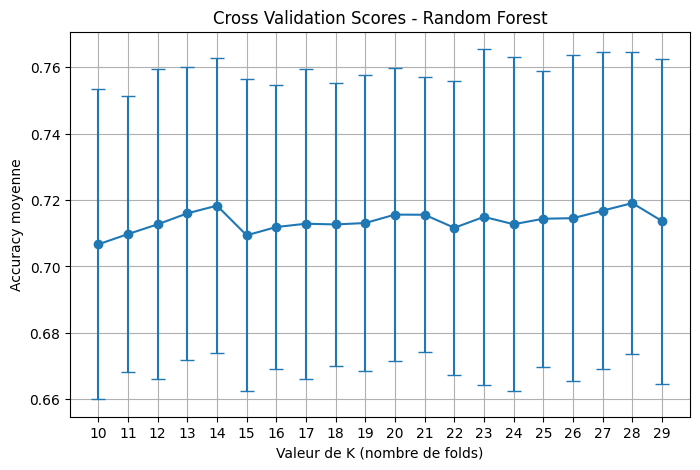

In [17]:
# --- 1. Imports ---
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

# --- 2. Chargement du dataset ---
df = pd.read_csv('movie_dataset_supervised_critique_cleaned.csv')

# --- 3. Features / Target ---
X = df[['budget', 'original_language', 'popularity', 'revenue', 'runtime', 'vote_count', 'director']]
y = df['critique_success']

# --- 4. Colonnes numériques / catégoriques ---
categorical_cols = ['original_language', 'director']
numeric_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_count']

# --- 5. Préprocessing ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# --- 6. Pipeline avec Forêt Aléatoire ---
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=201,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

# --- 7. Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 8. Entraînement ---
clf.fit(X_train, y_train)

# --- 9. Prédictions ---
y_pred = clf.predict(X_test)

# --- 10. Évaluation ---
print("Random Forest Classifier Results:")
print(f"Accuracy: {clf.score(X_test, y_test):.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Score de précision
correct_predictions = (y_test == y_pred).sum()
accuracy = correct_predictions / len(y_test)
print(f"\nModel Accuracy: {accuracy:.2f}")

# ===============================================================
# ===   CROSS VALIDATION AVEC DIFFERENTES VALEURS DE K        ===
# ===============================================================

k_values = [i for i in range(10, 30) ]
mean_scores = []
std_scores = []

print("\n=== Cross Validation avec Random Forest ===")
for k in k_values:
    scores = cross_val_score(
        clf,
        X, y,
        cv=k,
        scoring='accuracy',
        n_jobs=-1
    )
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

    print(f"K = {k}  ->  Accuracy moyenne = {scores.mean():.4f}  (std = {scores.std():.4f})")

# --- Graphique Matplotlib ---
plt.figure(figsize=(8,5))
plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='-o', capsize=5)
plt.title("Cross Validation Scores - Random Forest")
plt.xlabel("Valeur de K (nombre de folds)")
plt.ylabel("Accuracy moyenne")
plt.grid(True)
plt.xticks(k_values)
plt.show()
